In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  

In [2]:
data = "./data/worldfire.csv"
df_fire = pd.read_csv(data)

In [3]:
df_fire

,Unnamed: 0,Year,Fires,Acres,fossil emissions excluding carbonation,land-use change emissions,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance
0,0,1983,18229,1323666,5.185052,1.272159,3.92940,1.954881,0.291176,0.047107,0.234647
1,1,1984,20493,1148409,5.364824,1.411811,2.61252,1.840391,2.670000,0.048557,-0.394832
2,2,1985,82591,2896147,5.545165,1.337713,3.48336,1.723412,2.547647,0.049961,-0.921502
3,3,1986,85907,2719162,5.627627,1.317747,2.12400,1.754050,2.161176,0.052336,0.853811
4,4,1987,71300,2447296,5.804092,1.263666,5.64984,1.850043,0.381176,0.054798,-0.868100
5,5,1988,72750,5009290,6.032041,1.229257,4.63032,1.768017,2.071765,0.058077,-1.266880
6,6,1989,48949,1827310,6.115402,1.188241,3.14352,1.738237,3.412353,0.058037,-1.048504
7,7,1990,66481,4621621,6.208945,1.173356,2.54880,1.917607,2.225882,0.057504,0.632508
8,8,1991,75754,2953578,6.342277,1.149587,1.59300,2.003817,2.023529,0.061053,1.810464
9,9,1992,87394,2069929,6.159832,1.198580,1.50804,2.167586,2.123529,0.061916,1.497340


In [4]:
df_fire.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              38 non-null     int64  
 1   Year                                    38 non-null     int64  
 2   Fires                                   38 non-null     int64  
 3   Acres                                   38 non-null     int64  
 4   fossil emissions excluding carbonation  38 non-null     float64
 5   land-use change emissions               38 non-null     float64
 6   atmospheric growth                      38 non-null     float64
 7   ocean sink                              38 non-null     float64
 8   land sink                               38 non-null     float64
 9   cement carbonation sink                 38 non-null     float64
 10  budget imbalance                        38 non-null     float64


In [5]:
df_fire.describe() 

,Unnamed: 0,Year,Fires,Acres,fossil emissions excluding carbonation,land-use change emissions,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance
count,38.000000,38.000000,38.000000,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,18.500000,2001.500000,70295.868421,5.223975e+06,7.591900,1.233808,4.027775,2.237913,2.537988,0.114666,-0.092634
std,11.113055,11.113055,17353.088016,2.923620e+06,1.587647,0.154634,1.260426,0.388386,0.852339,0.057778,0.769127
min,0.000000,1983.000000,18229.000000,1.148409e+06,5.185052,0.876090,1.508040,1.723412,0.291176,0.047107,-1.810323
25%,9.250000,1992.250000,64087.000000,2.866756e+06,6.234653,1.154143,3.180690,1.948667,2.129265,0.062979,-0.534417
50%,18.500000,2001.500000,71735.000000,4.642992e+06,7.026507,1.241946,4.067460,2.151559,2.670882,0.092006,-0.160763
75%,27.750000,2010.750000,81936.250000,7.921783e+06,9.330558,1.310839,5.102910,2.479750,3.220000,0.167296,0.394693
max,37.000000,2020.000000,96385.000000,1.012515e+07,10.017059,1.820590,6.265800,2.994931,3.941176,0.218774,1.810464


In [6]:
df_fire.tail()

,Unnamed: 0,Year,Fires,Acres,fossil emissions excluding carbonation,land-use change emissions,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance
33,33,2016,67743,5509995,9.675890,1.010801,6.01092,2.934155,2.800000,0.199106,-1.257491
34,34,2017,71499,10026086,9.805059,0.999694,4.56660,2.839220,3.524706,0.203694,-0.329466
35,35,2018,58083,8767492,10.001676,1.052822,5.11884,2.907691,3.346471,0.210856,-0.529360
36,36,2019,50477,4664364,10.017059,1.044053,5.39496,2.973975,2.692353,0.215298,-0.215473
37,37,2020,58950,10122336,9.499798,0.876090,5.01264,2.994931,2.924706,0.218774,-0.775163


<AxesSubplot:>

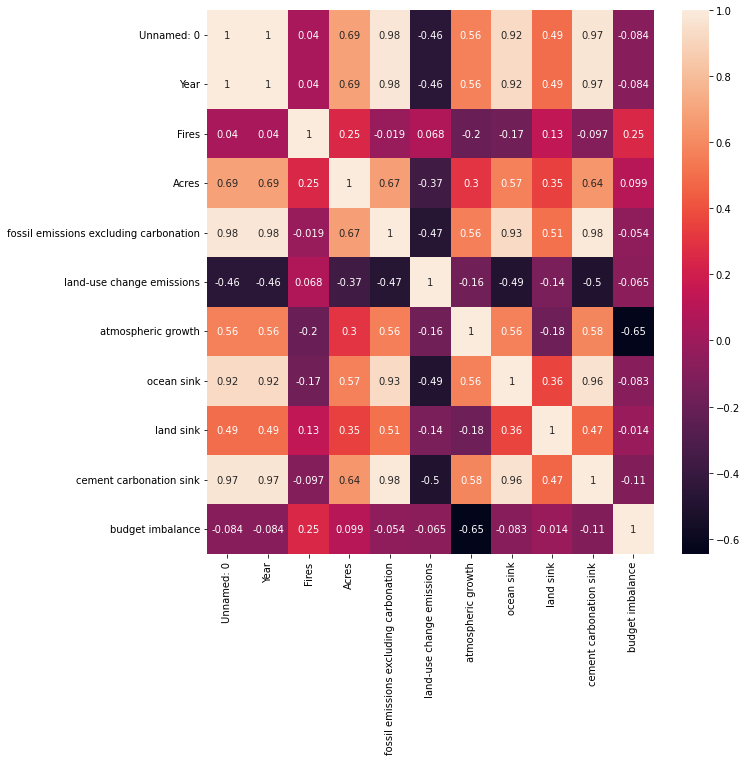

In [7]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_fire.corr(), annot=True)

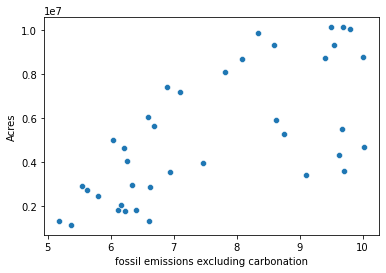

In [8]:
sns.scatterplot(data=df_fire,x='fossil emissions excluding carbonation', y='Acres') 
plt.show()

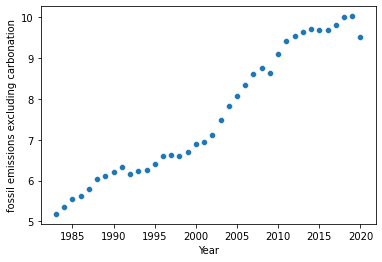

In [9]:
# 입력데이터와 정답데이터를 분리
X1 = df_fire['Year'] 
y1 = df_fire['fossil emissions excluding carbonation'] 

# scatter chart 그리기
sns.scatterplot( x = X1, y = y1) 
plt.show()  

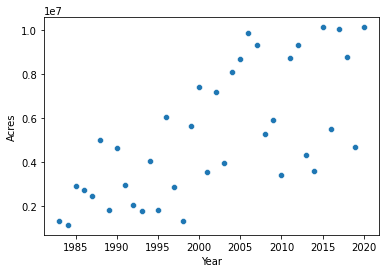

In [10]:
# 입력데이터와 정답데이터를 분리
X1 = df_fire['Year'] 
y1 = df_fire['Acres'] 

# scatter chart 그리기
sns.scatterplot( x = X1, y = y1) 
plt.show()  

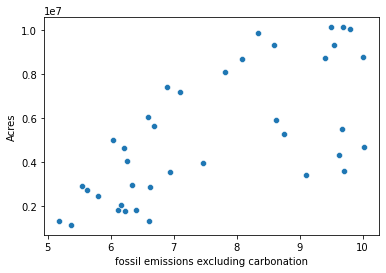

In [11]:
# 입력데이터와 정답데이터를 분리
X2 = df_fire['fossil emissions excluding carbonation'] 
y2 = df_fire['Acres'] 

# scatter chart 그리기
sns.scatterplot( x = X2, y = y2) 
plt.show()                     


In [12]:
# 머신러닝 학습을 위해 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눔
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state=20, shuffle=True)

In [13]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.2, random_state=20, shuffle=True)

# 모델 생성 및 학습

In [14]:
# 선형회귀(Linear Regression) 모델 선언하기
model_lr1 = LinearRegression()
model_lr1

LinearRegression()

In [15]:
# 선형회귀(Linear Regression) 모델 학습하기
model_lr1.fit(X1_train.values.reshape(-1,1), y1_train)

LinearRegression()

In [16]:
model_lr2 = LinearRegression()
model_lr2

LinearRegression()

In [17]:
model_lr2.fit(X2_train.values.reshape(-1,1), y2_train)

LinearRegression()

In [18]:
# 테스트 데이터에 대한 예측을 수행
# 예측을 위해서도 X_test 데이터를 2차원으로 바꿔서 넣어야 함.
y1_pred = model_lr1.predict(X1_test.values.reshape(-1,1))

In [19]:
y2_pred = model_lr2.predict(X2_test.values.reshape(-1,1))

In [20]:
y1_pred

array([2792598.4296875 , 6241754.34375   , 4435053.62686008,
       2299861.87053567, 6898736.42261904, 4270808.10714281,
       5913263.30431545, 4106562.58742559])

In [21]:
#print(type(X_test))
print(X1_test.values)   # 1차원
print(X1_test.values.reshape(-1,1)) # 2차원

[1987 2008 1997 1984 2012 1996 2006 1995]
[[1987]
 [2008]
 [1997]
 [1984]
 [2012]
 [1996]
 [2006]
 [1995]]


In [22]:
# 2030년의 탄소 배출량 예측하기
emission_estimate= pd.Series([2035]) 
model_lr1.predict(emission_estimate.values.reshape(-1,1))

array([10676383.37611604])

In [23]:
# 2030년의 탄소 배출량에 따른 화재 면적 예측하기
fire_acres = pd.Series([12.22219333])
model_lr2.predict(fire_acres.values.reshape(-1,1))

array([10354494.34497887])

# 성능 평가

In [24]:
# MSE(Mean Squared Error)를 측정하기
MSE1 = mean_squared_error(y1_test, y1_pred) 
# mean_squared_error : error의 제곱 평균값(error의 제곱값 총 합/ 개수)을 구해주는 함수

# RMSE(Root Mean Squared Error)를 측정하기
RMSE1 = np.sqrt(MSE1)

print('MSE1 :', MSE1)
print('RMSE1 :', RMSE1)

# shuffle 하지 않았을 떄와 shuffle 했을 때 결과값을 비교하기(shuffle하면 성능이 더 좋아지는 경우 많음) 
# 데이터 사이즈에 따라 결과값 달라짐(test_size = 0.2 일 때, test_size = 0.3일 때 비교하기)
# MSE와 RMSE 값이 작을수록 성능 더 좋은 것

MSE1 : 4346540223838.9727
RMSE1 : 2084835.7786259744


In [25]:
MSE2 = mean_squared_error(y2_test, y2_pred) 
RMSE2 = np.sqrt(MSE2)

print('MSE2 :', MSE2)
print('RMSE2 :', RMSE2)

MSE2 : 4083763552448.4473
RMSE2 : 2020832.3909835885


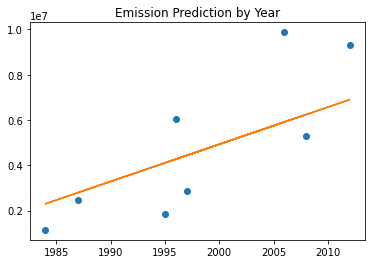

In [26]:
plt.plot(X1_test, y1_test, 'o')
plt.plot(X1_test, y1_pred)
plt.title('Emission Prediction by Year')
plt.show() 

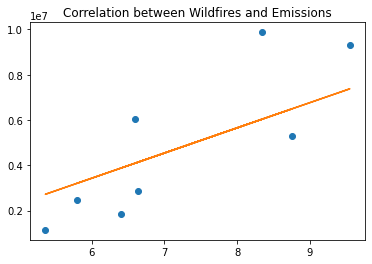

In [27]:
plt.plot(X2_test, y2_test, 'o')
plt.plot(X2_test, y2_pred)
plt.title('Correlation between Wildfires and Emissions')
plt.show() 